<a href="https://colab.research.google.com/github/z-guard/analysis/blob/main/notebooks/population_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人口分布
- input:
    - population_master.csv
        - 年代ごとの人口
- output:
    - population_score.csv
        - 年代ことの人口分布スコア

In [77]:
!pip install -q japanize-matplotlib

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
DIR_NAME = '/content/drive/MyDrive/z-gard/data'

In [80]:
import os
import requests
import json
import pandas as pd
from urllib.parse import urlparse, quote
import io
import math
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [81]:
output_score_file = 'population_score.csv'

## 人口マスタ

In [82]:
df_pop_master = pd.read_csv(os.path.join(DIR_NAME, 'population_master.csv'))
print(df_pop_master.shape)

(3145, 60)


In [83]:
list(df_pop_master.columns)

['town_id',
 '市区町村名',
 '町名',
 '町丁目',
 '人口総数（人）',
 '面積（km2）',
 '人口密度(人/km2)',
 '0〜4歳（人）',
 '5〜9歳（人）',
 '10〜14歳（人）',
 '15〜19歳（人）',
 '20〜24歳（人）',
 '25〜29歳（人）',
 '30〜34歳（人）',
 '35〜39歳（人）',
 '40〜44歳（人）',
 '45〜49歳（人）',
 '50〜54歳（人）',
 '55〜59歳（人）',
 '60〜64歳（人）',
 '65〜69歳（人）',
 '70〜74歳（人）',
 '75〜79歳（人）',
 '80〜84歳（人）',
 '85〜89歳（人）',
 '90〜94歳（人）',
 '95〜99歳（人）',
 '100歳以上（人）',
 '年齢不詳（人）',
 '平均年齢（歳）',
 '外国人（人）',
 '対象',
 '世帯総数',
 '1人世帯',
 '2人世帯',
 '3人世帯',
 '4人世帯',
 '5人以上世帯',
 '世帯人員（人）',
 '1世帯当たり人員（人）',
 '労働力人口割合%',
 '非労働力人口割合%',
 '非労働力_専業主婦割合%',
 '非労働力_学生割合%',
 '非労働力_幼児・高齢者割合%',
 '労働力_サラリーマン割合%',
 '労働力_役員割合%',
 '労働力_自営業者割合%',
 '労働力_パートタイム割合%',
 '労働力_学生アルバイト割合%',
 '持ち家_割合%',
 '公営借家_割合%',
 '民営借家_割合%',
 '社宅_割合%',
 '一戸建_割合%',
 '長屋建_割合%',
 '共同住宅_１・２階建_割合%',
 '共同住宅_３～５階建_割合%',
 '共同住宅_６～10階建_割合%',
 '共同住宅_11階建以上_割合%']

In [84]:
df_pop_master['乳幼児割合'] = (df_pop_master['0〜4歳（人）'] + df_pop_master['5〜9歳（人）'] * 1/5) / df_pop_master['人口総数（人）']
df_pop_master['小学生割合'] = (df_pop_master['5〜9歳（人）'] * 4/5 + df_pop_master['10〜14歳（人）'] * 2/5) / df_pop_master['人口総数（人）']
df_pop_master['中学生割合'] = (df_pop_master['10〜14歳（人）'] * 3/5) / df_pop_master['人口総数（人）']
df_pop_master['高校生割合'] = (df_pop_master['15〜19歳（人）'] * 3/5) / df_pop_master['人口総数（人）']
df_pop_master['10代割合'] = (df_pop_master['15〜19歳（人）'] * 2/5) / df_pop_master['人口総数（人）']
df_pop_master['20代割合'] = (df_pop_master['20〜24歳（人）'] + df_pop_master['25〜29歳（人）']) / df_pop_master['人口総数（人）']
df_pop_master['30代割合'] = (df_pop_master['30〜34歳（人）'] + df_pop_master['35〜39歳（人）']) / df_pop_master['人口総数（人）']
df_pop_master['40代割合'] = (df_pop_master['40〜44歳（人）'] + df_pop_master['45〜49歳（人）']) / df_pop_master['人口総数（人）']
df_pop_master['50代割合'] = (df_pop_master['50〜54歳（人）'] + df_pop_master['55〜59歳（人）']) / df_pop_master['人口総数（人）']
df_pop_master['60代割合'] = (df_pop_master['60〜64歳（人）'] + df_pop_master['65〜69歳（人）']) / df_pop_master['人口総数（人）']
df_pop_master['10代_子割合'] = df_pop_master['10代割合'] + df_pop_master['乳幼児割合'] * 5
df_pop_master['20代_子割合'] = df_pop_master['20代割合'] + (df_pop_master['乳幼児割合'] + df_pop_master['小学生割合']) * 5
df_pop_master['30代_子割合'] = df_pop_master['30代割合'] + (df_pop_master['乳幼児割合'] + df_pop_master['小学生割合'] + df_pop_master['中学生割合']) * 5
df_pop_master['40代_子割合'] = df_pop_master['40代割合'] + (df_pop_master['小学生割合'] + df_pop_master['中学生割合'] + df_pop_master['高校生割合']) * 5
df_pop_master['50代_子割合'] = df_pop_master['50代割合'] + (df_pop_master['中学生割合'] + df_pop_master['高校生割合'] + df_pop_master['10代割合']) * 5

In [85]:
df_pop_master['戸建割合'] = df_pop_master['一戸建_割合%']
df_pop_master['マンション割合'] = df_pop_master['共同住宅_１・２階建_割合%'] + df_pop_master['共同住宅_３～５階建_割合%'] + df_pop_master['共同住宅_６～10階建_割合%'] + df_pop_master['共同住宅_11階建以上_割合%']
df_pop_master['低層マンション割合'] = df_pop_master['共同住宅_１・２階建_割合%']
df_pop_master['中層マンション割合'] = df_pop_master['共同住宅_３～５階建_割合%'] + df_pop_master['共同住宅_６～10階建_割合%']
df_pop_master['高層マンション割合'] = df_pop_master['共同住宅_11階建以上_割合%']
df_pop_master['持ち家割合'] = df_pop_master['持ち家_割合%']
df_pop_master['賃貸割合'] = df_pop_master['民営借家_割合%']
df_pop_master['団地割合'] = df_pop_master['公営借家_割合%']

In [86]:
df_pop_master['単身割合'] = df_pop_master['1人世帯'] / df_pop_master['世帯総数']
df_pop_master['カップル割合'] = df_pop_master['2人世帯'] / df_pop_master['世帯総数']
df_pop_master['ファミリー割合'] = (df_pop_master['3人世帯'] + df_pop_master['4人世帯'] + df_pop_master['5人以上世帯'] )/ df_pop_master['世帯総数']
df_pop_master['大家族割合'] = df_pop_master['5人以上世帯'] / df_pop_master['世帯総数']

df_pop_master['学生指数'] = (df_pop_master['非労働力_学生割合%'] + df_pop_master['労働力_学生アルバイト割合%']) * df_pop_master['単身割合'] * 100
df_pop_master['専業主婦指数'] = df_pop_master['非労働力_専業主婦割合%'] * df_pop_master['ファミリー割合'] * 100
df_pop_master['上流指数'] = df_pop_master['労働力_役員割合%'] * df_pop_master['非労働力_専業主婦割合%'] * df_pop_master['持ち家_割合%'] * 1000
df_pop_master['中流指数'] = df_pop_master['労働力_サラリーマン割合%'] * df_pop_master['労働力_パートタイム割合%'] * df_pop_master['賃貸割合'] * 1000

In [87]:
feature_list = [col for col in df_pop_master.columns if col.endswith(('割合', '指数'))]
df_pop_rate = df_pop_master[['town_id', '市区町村名', '町名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象'] + feature_list].copy()
print(df_pop_rate.shape)
df_pop_rate[1000:1003]

(3145, 38)


,town_id,市区町村名,町名,町丁目,人口総数（人）,人口密度(人/km2),対象,乳幼児割合,小学生割合,中学生割合,高校生割合,10代割合,20代割合,30代割合,40代割合,50代割合,60代割合,10代_子割合,20代_子割合,30代_子割合,40代_子割合,50代_子割合,戸建割合,マンション割合,低層マンション割合,中層マンション割合,高層マンション割合,持ち家割合,賃貸割合,団地割合,単身割合,カップル割合,ファミリー割合,大家族割合,学生指数,専業主婦指数,上流指数,中流指数
1000,109098,品川区,小山,小山７丁目,1317,14633.3,1,0.039636,0.044343,0.024601,0.023235,0.015490,0.113895,0.132878,0.172361,0.124525,0.101746,0.213667,0.533789,0.675778,0.633257,0.441154,0.502423,0.431341,0.153473,0.277868,0.000000,0.551387,0.433931,0.000000,0.418006,0.271704,0.310289,0.035370,3.061250,4.869406,5.129923,9.320426
1001,109100,品川区,荏原,荏原１丁目,2858,23816.7,1,0.040168,0.039188,0.017215,0.020154,0.013436,0.150455,0.201190,0.164801,0.092722,0.097271,0.214276,0.547236,0.684045,0.547586,0.346746,0.262285,0.731572,0.070639,0.492015,0.168919,0.337274,0.581207,0.000000,0.620359,0.182036,0.197605,0.022156,2.775489,1.895604,1.160638,11.242372
1002,109101,品川区,荏原,荏原２丁目,3181,22721.4,1,0.035901,0.041245,0.019994,0.030556,0.020371,0.107513,0.125747,0.170701,0.136121,0.101855,0.199874,0.493241,0.611443,0.629676,0.490726,0.248562,0.733546,0.095208,0.498403,0.139936,0.557990,0.417526,0.016108,0.509554,0.226752,0.263694,0.035032,3.980604,2.403290,1.618524,9.369232


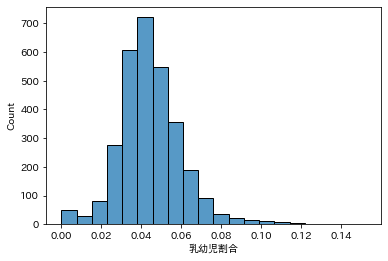

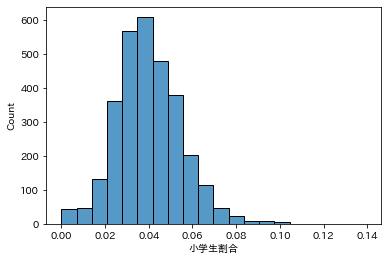

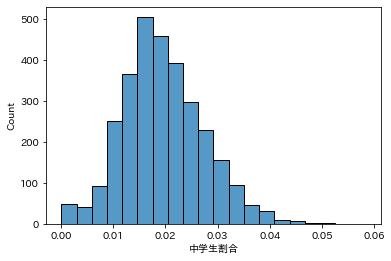

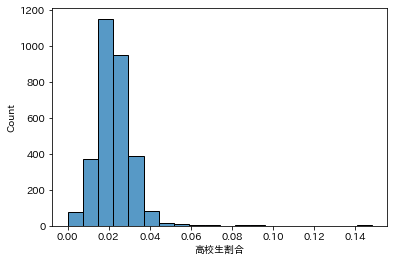

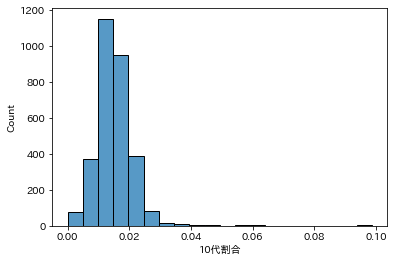

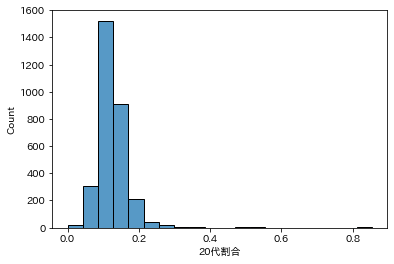

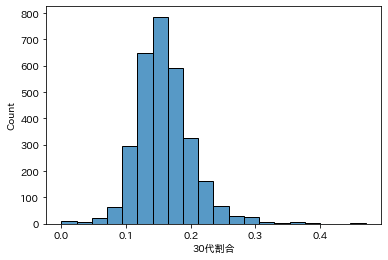

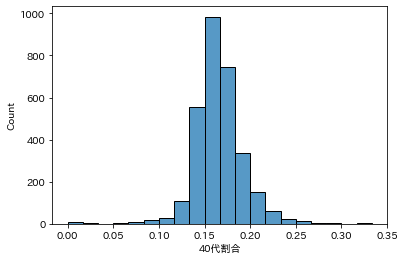

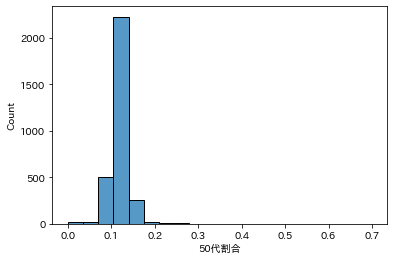

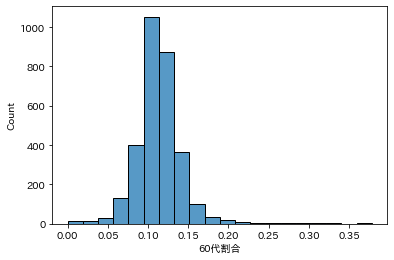

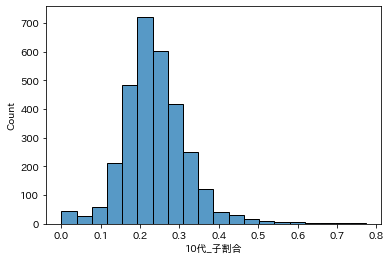

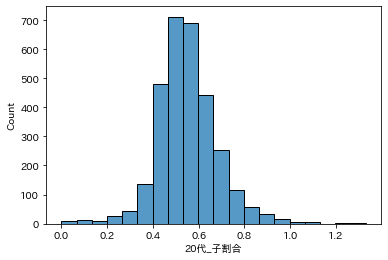

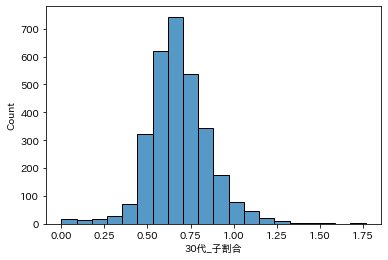

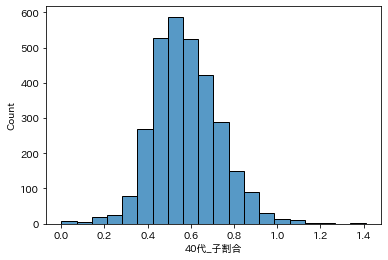

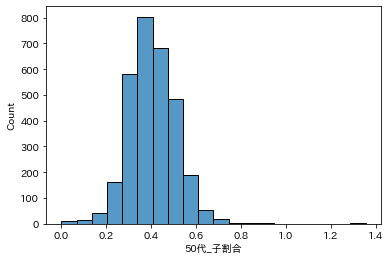

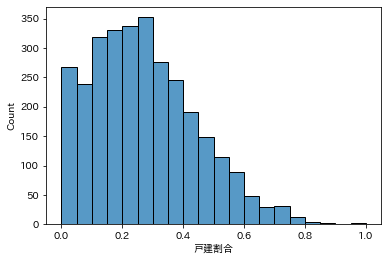

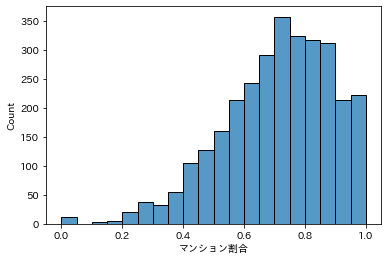

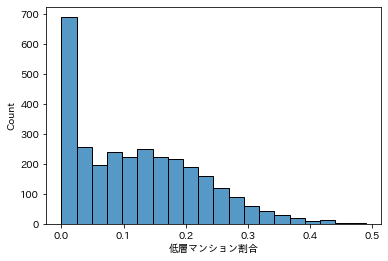

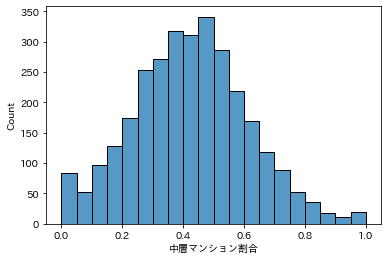

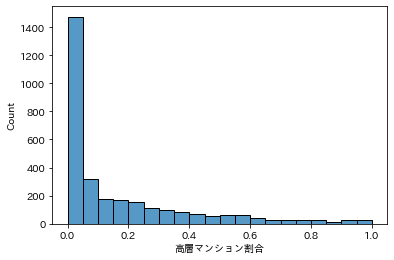

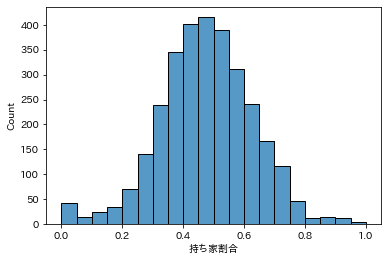

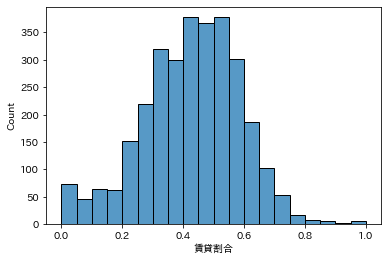

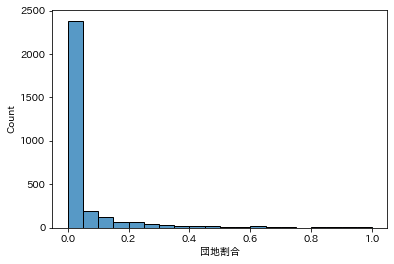

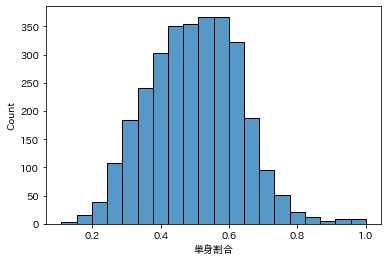

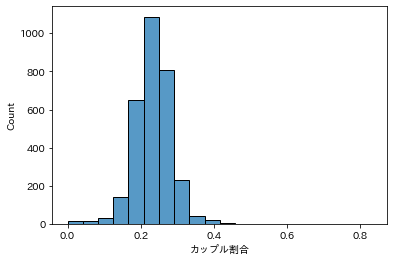

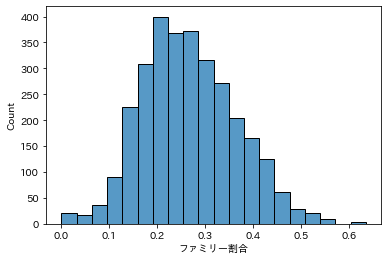

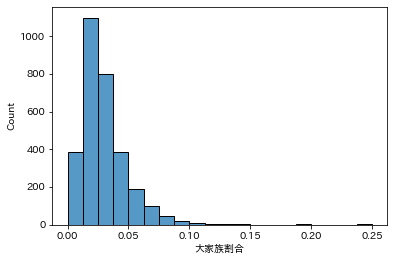

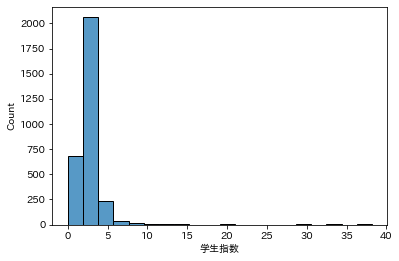

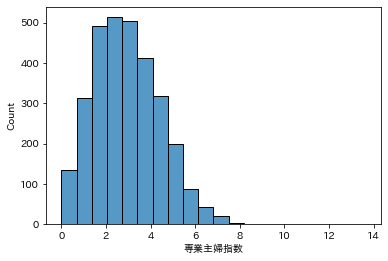

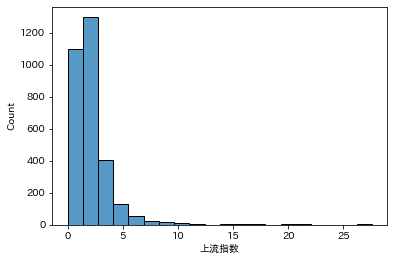

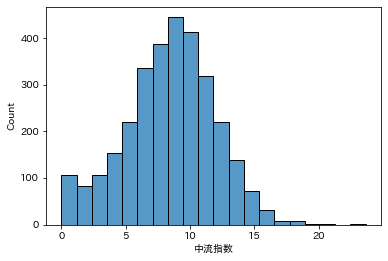

In [88]:
for feature_name in feature_list:
    sns.histplot(df_pop_rate[feature_name], bins=20)
    plt.show()

In [89]:
import numpy as np

def rank_score(sr_data):
    rank = sr_data.rank()
    rmax = rank.max()
    rmin = rank.min()
    max_val = 5
    x = (rank - rmin)/(rmax - rmin) * max_val
    return np.clip(x, 0, max_val)

In [90]:
for feature_name in feature_list:
    df_pop_rate[feature_name + 'スコア'] = rank_score(df_pop_rate[feature_name]).round(2)
    df_pop_rate.loc[df_pop_rate['対象'] == 0, feature_name + 'スコア'] = 0

score_list = [col + 'スコア' for col in feature_list]

In [91]:
df_pop_rate[['town_id', '市区町村名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象', '小学生割合', '小学生割合スコア']].sort_values(['小学生割合スコア', '小学生割合'], ascending=False).head(10)

,town_id,市区町村名,町丁目,人口総数（人）,人口密度(人/km2),対象,小学生割合,小学生割合スコア
3074,123156,江戸川区,東篠崎２丁目,606,1637.8,1,0.139274,5.00
1943,116007,豊島区,駒込５丁目,668,6680.0,1,0.107784,5.00
2142,118010,荒川区,南千住８丁目,11773,18687.3,1,0.103117,5.00
907,108182,江東区,新砂２丁目,452,779.3,1,0.101770,5.00
1554,112243,世田谷区,千歳台６丁目,4292,30657.1,1,0.099254,4.99
261,103062,港区,元麻布２丁目,2168,15485.7,1,0.097970,4.99
2938,122176,葛飾区,南水元３丁目,3734,28723.1,1,0.097804,4.99
2892,122123,葛飾区,細田２丁目,349,6980.0,1,0.097421,4.99
885,108157,江東区,北砂２丁目,3095,15475.0,1,0.096801,4.99
3018,123089,江戸川区,谷河内２丁目,2046,17050.0,1,0.096579,4.98


In [92]:
df_pop_rate[['town_id', '市区町村名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象', '20代割合', '20代割合スコア']].sort_values(['20代割合スコア', '20代割合'], ascending=False).head(10)

,town_id,市区町村名,町丁目,人口総数（人）,人口密度(人/km2),対象,20代割合,20代割合スコア
2402,120104,練馬区,北町４丁目,974,3896.0,1,0.748460,5.00
528,105058,文京区,本郷７丁目,592,1376.7,1,0.599662,4.99
835,108097,江東区,青海２丁目,1035,1916.7,1,0.546860,4.99
573,106030,台東区,秋葉原,122,6100.0,1,0.532787,4.99
140,102033,中央区,築地５丁目,395,940.5,1,0.496203,4.99
62,101082,千代田区,神田駿河台２丁目,390,2785.7,1,0.464103,4.99
232,103025,港区,西新橋３丁目,735,6125.0,1,0.359184,4.98
14,101022,千代田区,隼町,471,3925.0,1,0.318471,4.98
159,102057,中央区,日本橋本町２丁目,185,4625.0,1,0.291892,4.98
1602,112300,世田谷区,八幡山２丁目,2031,10155.0,1,0.290497,4.97


In [93]:
df_pop_rate[['town_id', '市区町村名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象', '20代_子割合', '20代_子割合スコア']].sort_values(['20代_子割合スコア', '20代_子割合'], ascending=False).head(10)

,town_id,市区町村名,町丁目,人口総数（人）,人口密度(人/km2),対象,20代_子割合,20代_子割合スコア
3074,123156,江戸川区,東篠崎２丁目,606,1637.8,1,1.330033,5.00
2056,117044,北区,十条台２丁目,385,3500.0,1,1.218182,5.00
3046,123121,江戸川区,鹿骨町,145,14500.0,1,1.206897,5.00
1943,116007,豊島区,駒込５丁目,668,6680.0,1,1.202096,5.00
822,108079,江東区,豊洲６丁目,2636,2559.2,1,1.099393,4.99
212,102122,中央区,晴海５丁目,1679,3997.6,1,1.097082,4.99
3139,123234,江戸川区,臨海町１丁目,2236,4300.0,1,1.076029,4.99
2652,121162,足立区,千住緑町１丁目,1302,8680.0,1,1.070661,4.99
819,108076,江東区,豊洲３丁目,7877,25409.7,1,1.029199,4.98
33,101043,千代田区,北の丸公園,726,1728.6,1,1.013774,4.98


In [94]:
df_pop_rate[['town_id', '市区町村名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象', '上流指数', '上流指数スコア']].sort_values(['上流指数スコア', '上流指数'], ascending=False).head(10)

,town_id,市区町村名,町丁目,人口総数（人）,人口密度(人/km2),対象,上流指数,上流指数スコア
1234,111117,大田区,田園調布３丁目,1690,5121.2,1,27.584103,5.00
1714,113100,渋谷区,神宮前６丁目,932,4438.1,1,17.609958,5.00
39,101051,千代田区,九段北２丁目,266,3325.0,1,17.020022,4.99
100,101131,千代田区,神田岩本町,49,2450.0,1,16.619183,4.99
254,103053,港区,麻布永坂町,222,4440.0,1,16.504793,4.99
110,101143,千代田区,神田松永町,53,2650.0,1,15.442251,4.99
1235,111118,大田区,田園調布４丁目,1919,5644.1,1,14.785096,4.99
222,103013,港区,東新橋１丁目,1410,5875.0,1,11.762558,4.98
87,101116,千代田区,鍛冶町１丁目,122,3050.0,1,11.747302,4.98
1251,111138,大田区,久が原６丁目,2085,13031.3,1,11.427767,4.98


In [95]:
df_pop_rate[['town_id', '市区町村名', '町丁目', '人口総数（人）', '人口密度(人/km2)', '対象', '中流指数', '中流指数スコア']].sort_values(['中流指数スコア', '中流指数'], ascending=False).head(10)

,town_id,市区町村名,町丁目,人口総数（人）,人口密度(人/km2),対象,中流指数,中流指数スコア
3119,123210,江戸川区,南葛西４丁目,3796,19978.9,1,23.654029,5.00
2223,119043,板橋区,小茂根５丁目,1079,6347.1,1,20.624296,5.00
3046,123121,江戸川区,鹿骨町,145,14500.0,1,20.452885,5.00
3121,123212,江戸川区,南葛西６丁目,5876,20262.1,1,19.511030,5.00
3078,123162,江戸川区,南篠崎町２丁目,3914,19570.0,1,18.795133,4.99
3079,123163,江戸川区,南篠崎町３丁目,2146,19509.1,1,18.693294,4.99
1289,111186,大田区,羽田旭町,527,1882.1,1,18.560886,4.99
1286,111182,大田区,西糀谷４丁目,4440,22200.0,1,18.462852,4.99
2299,119138,板橋区,徳丸７丁目,1823,15191.7,1,18.016100,4.99
998,109096,品川区,小山５丁目,2892,24100.0,1,18.001741,4.99


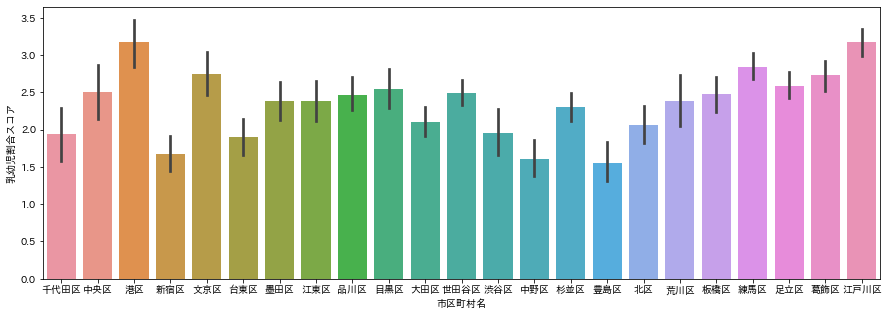

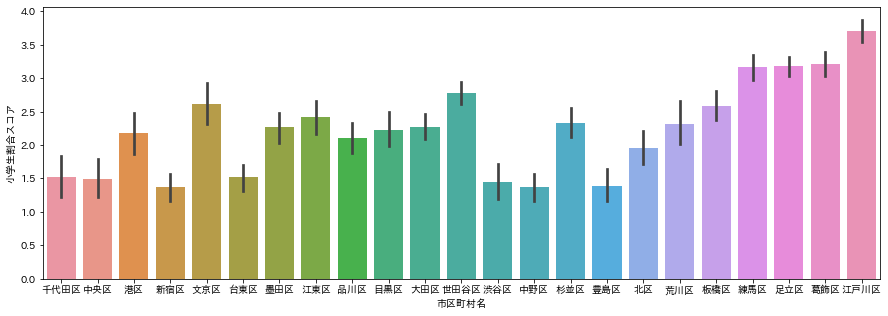

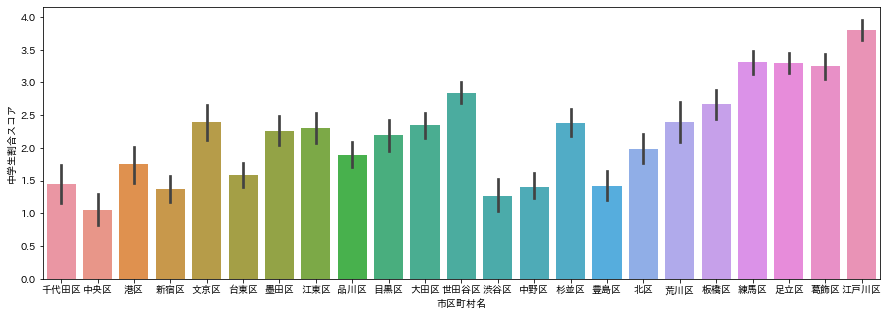

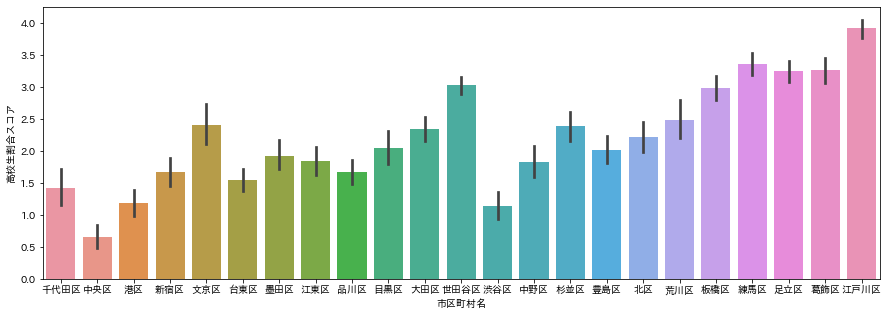

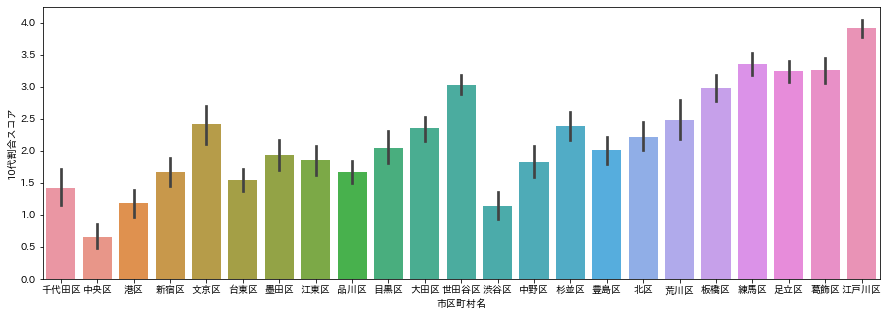

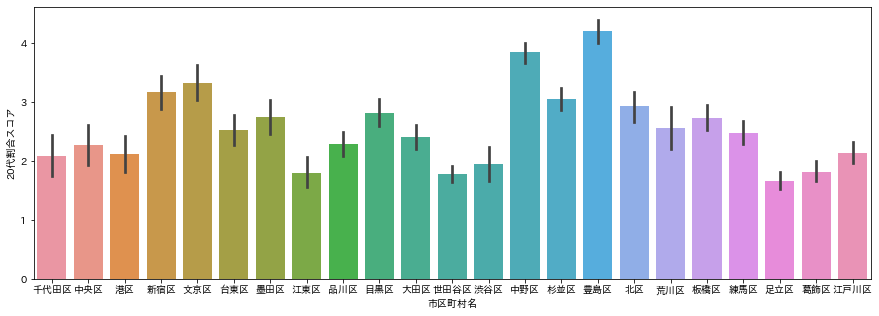

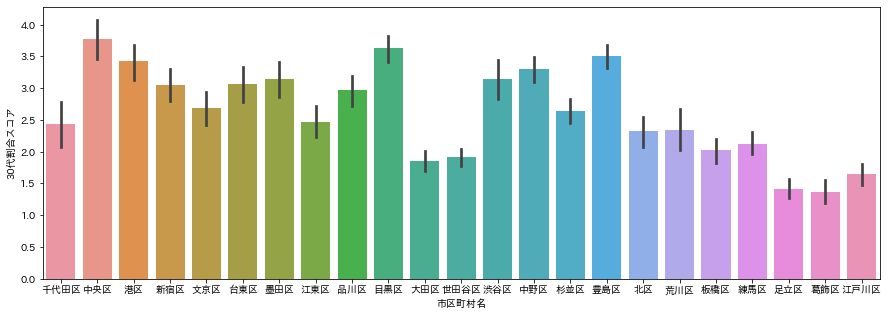

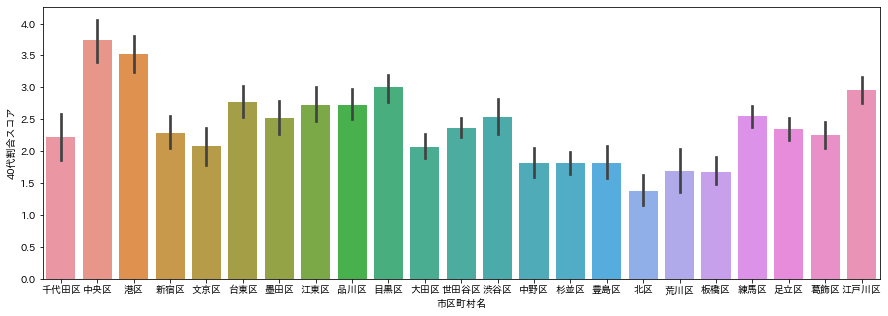

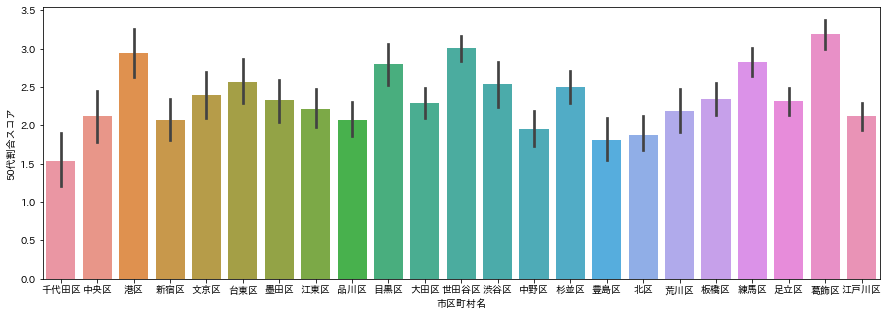

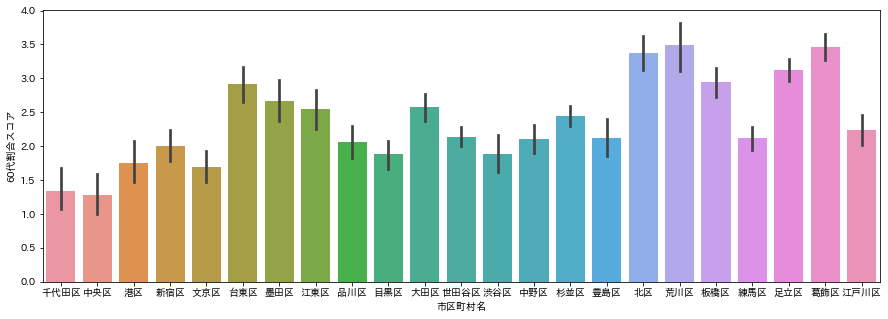

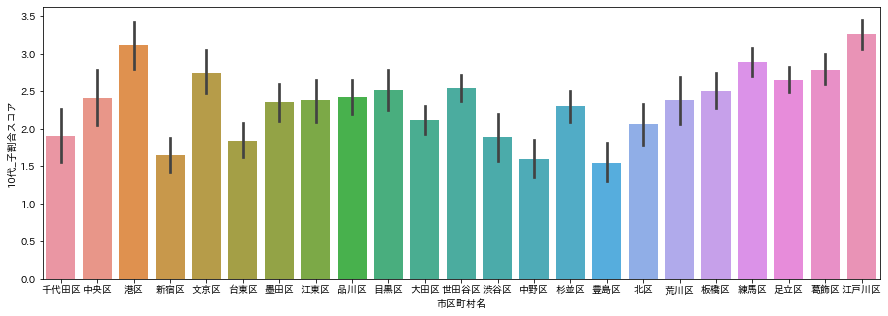

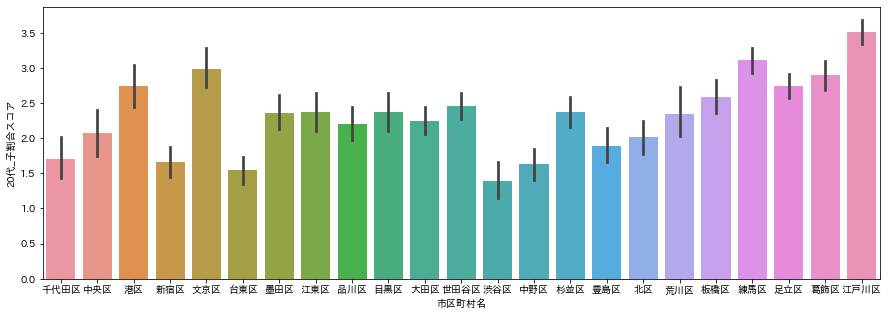

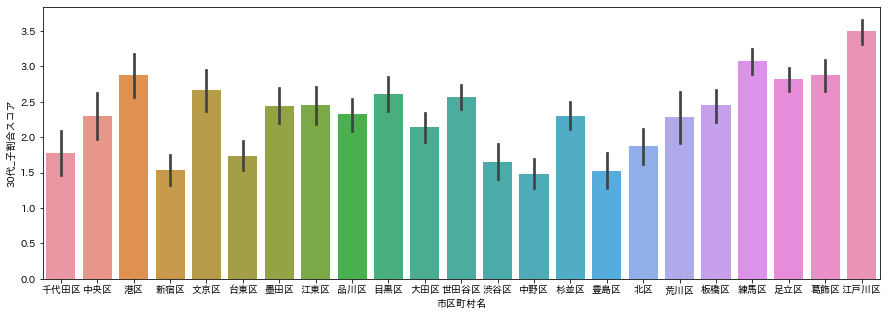

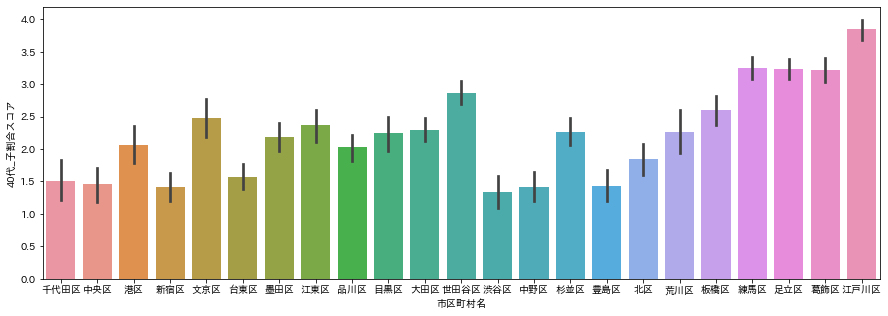

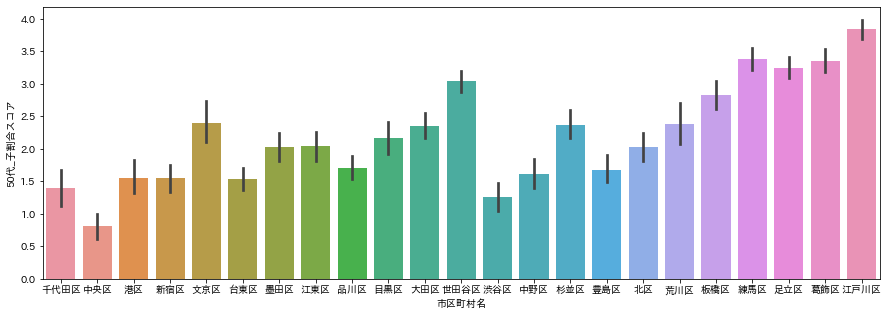

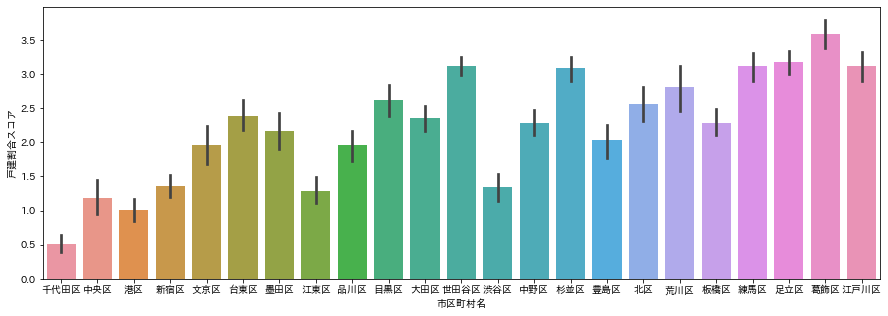

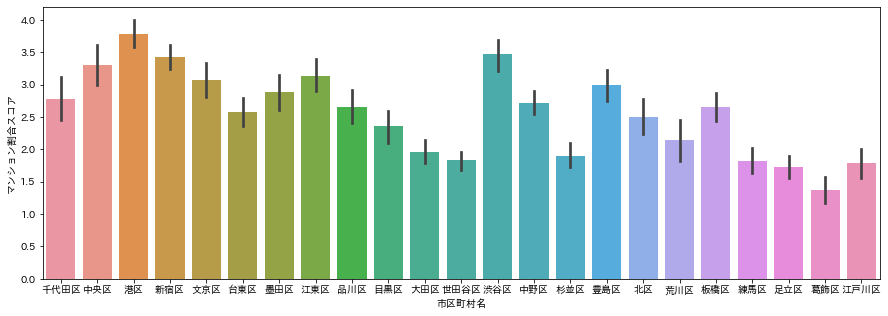

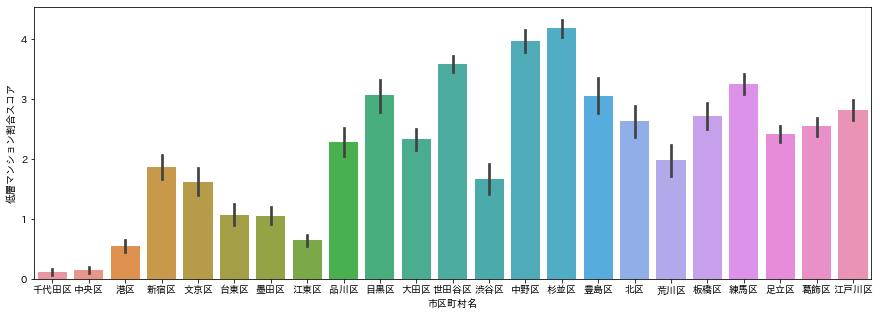

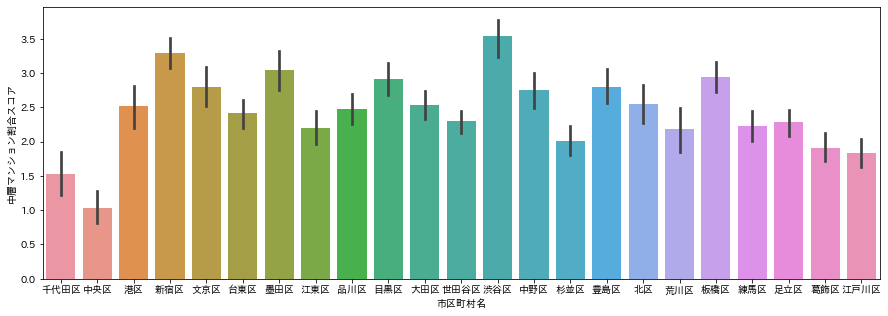

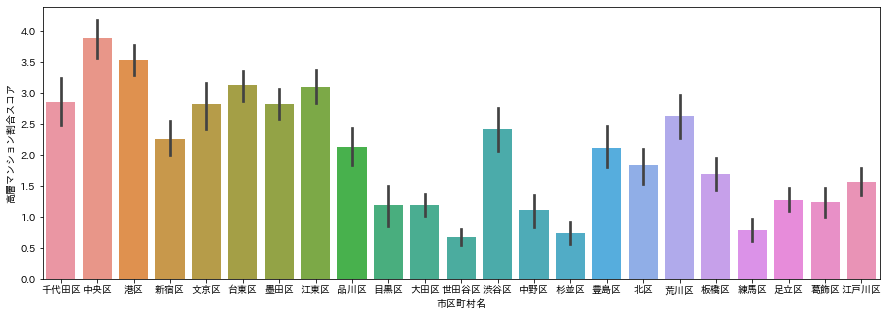

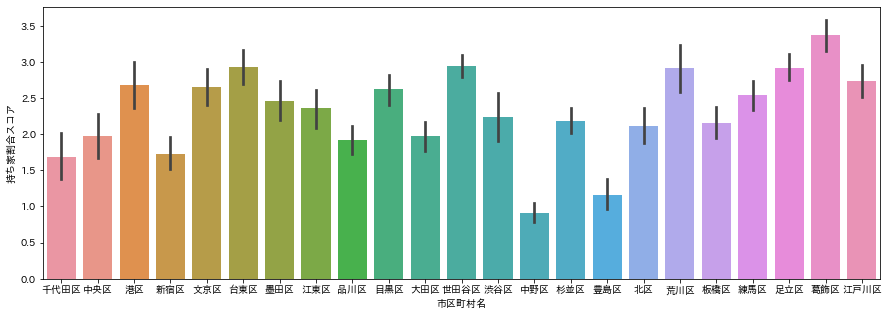

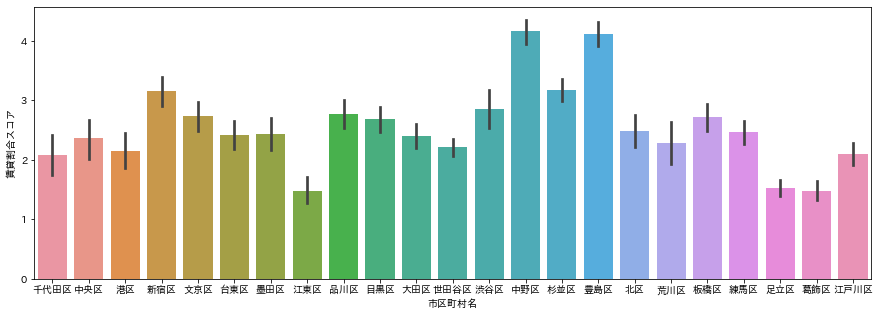

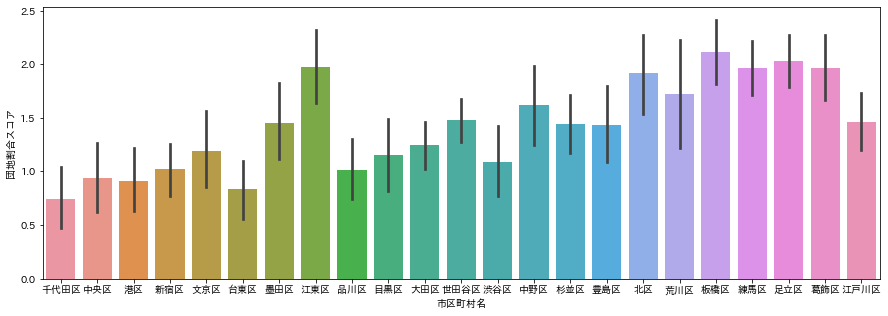

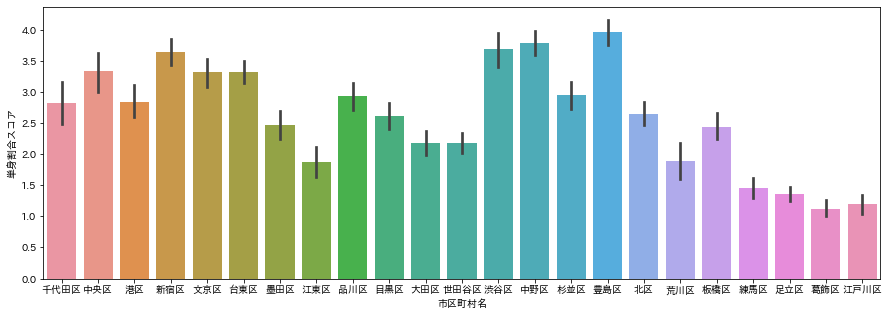

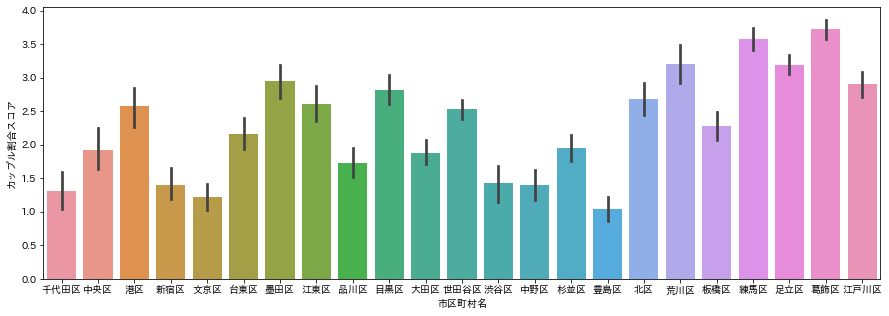

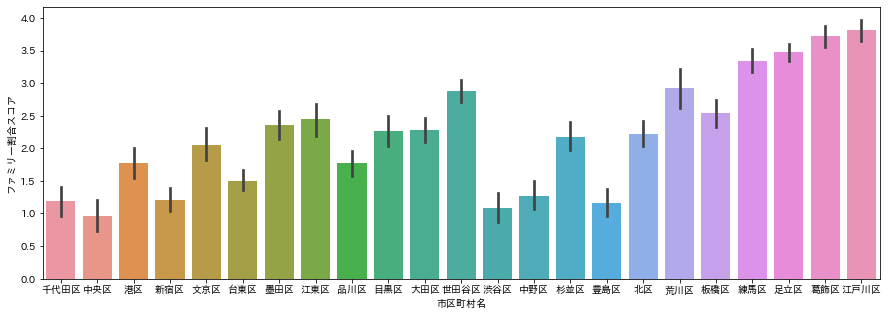

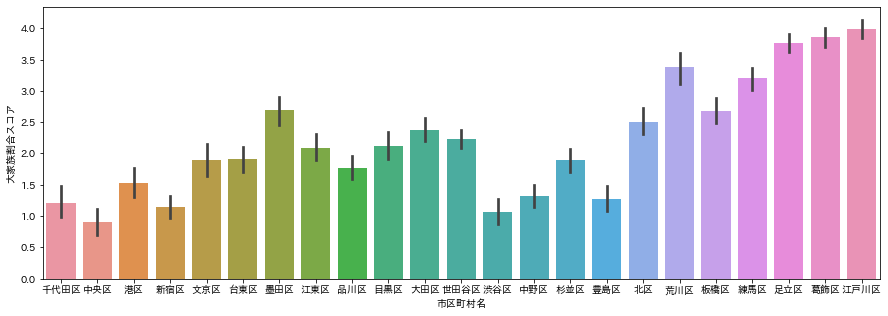

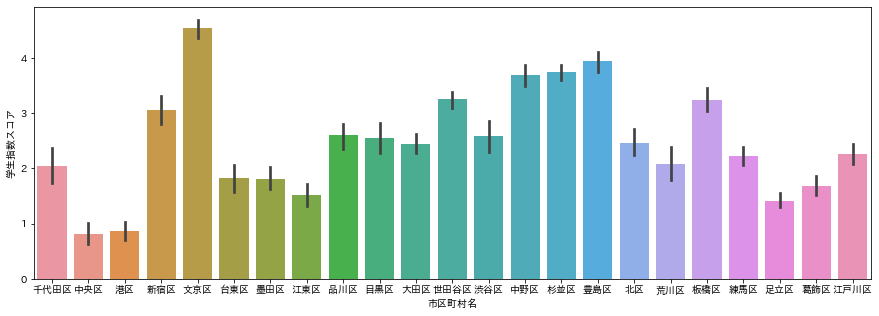

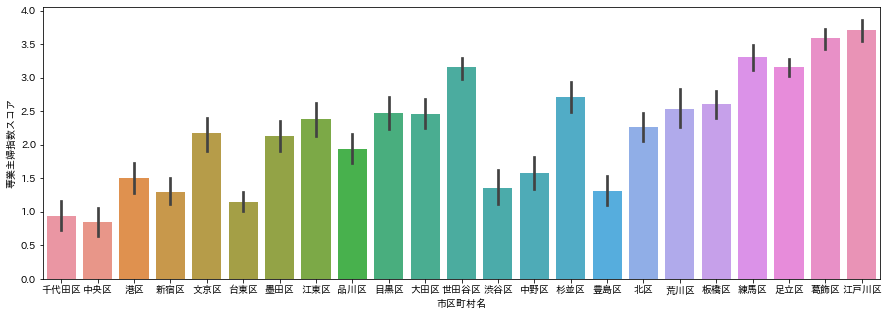

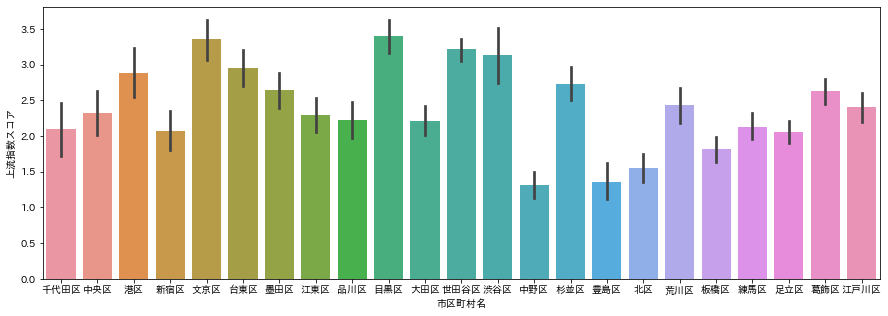

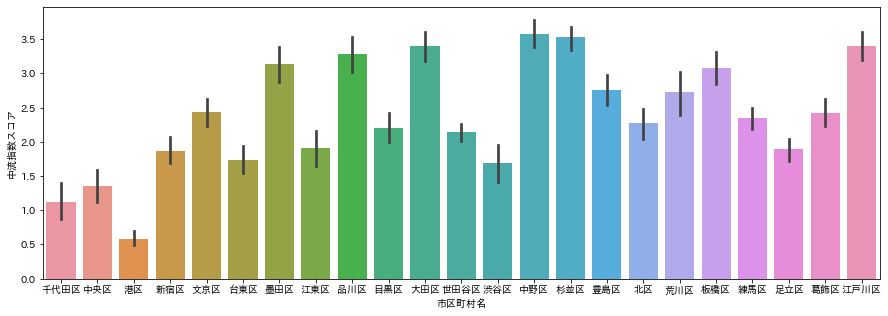

In [96]:
for score_name in score_list:
    plt.figure(figsize=(15, 5))
    sns.barplot(x='市区町村名', y=score_name, data=df_pop_rate)
    plt.show()

### 保存

In [97]:
df_pop_rate[['town_id'] + score_list].to_csv(os.path.join(DIR_NAME, output_score_file), index=False)